# Aufgabe 2: Multi-Class Perceptrons

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [3]:
X, y = make_blobs(n_samples=50, centers=3, cluster_std=0.2,n_features=2,center_box=(1,5),random_state=104)

In [4]:
y

array([0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2,
       1, 0, 0, 1, 0, 1])

In [5]:
def plot_line_from_normal_vector_and_offset(normal_vector, offset, x_range=None, ax=None, **kwargs):
    """
    Plots a 2D line defined by its normal vector w and offset b such that wx + b = 0.

    Args:
        normal_vector (list or numpy.ndarray): A 2D vector representing the normal to the line (w). Must be of length 2.
        offset (float): The offset (b) such that w.x + b = 0.
        x_range (tuple, optional): A tuple (xmin, xmax) specifying the range of x-values to plot.
                                     If None (default), a reasonable range is automatically determined.
        ax (matplotlib.axes._axes.Axes, optional): The matplotlib axes object to plot on. If None (default),
                                                  the current axes (plt.gca()) is used, or a new figure and axes
                                                  are created.
        **kwargs: Keyword arguments to pass to the `plot` function (e.g., color, linestyle, linewidth).

    Returns:
        matplotlib.lines.Line2D: The line object created by `ax.plot`.
    """
    normal_vector = np.array(normal_vector)  # Ensure it's a NumPy array for calculations

    if normal_vector.shape != (2,):
        raise ValueError("Normal vector must be a 2D vector (length 2).")

    w1, w2 = normal_vector

    if ax is None:
        fig, ax = plt.subplots()

    if x_range is None:
        # Determine a reasonable x-range
        xmin = -5
        xmax = 5
        x_range = (xmin, xmax)

    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 100)  # Generate x-values

    if w2 != 0:
        y = (-w1 * x - offset) / w2  # Solve for y: w1*x + w2*y + b = 0  =>  y = (-w1*x - b) / w2
    else:
        # Handle the case where the line is vertical (w2=0). Plot a vertical line.
        if w1 == 0:
            raise ValueError("Cannot plot line with w1=0 and w2=0.")
        x = np.full_like(x, -offset / w1)  # x is constant for a vertical line
        y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)  # generate y values spanning the current y-axis.



    line, = ax.plot(x, y, **kwargs)

    return line

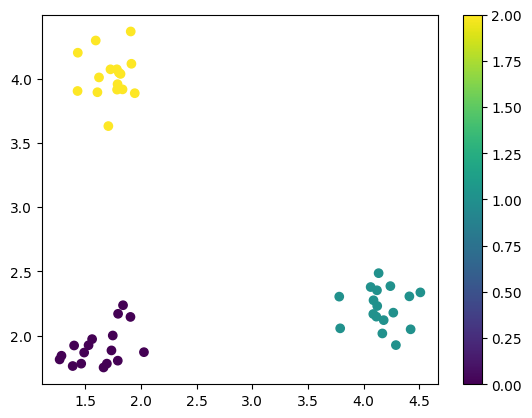

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

### draw Percepton layout
* Hint: now we have more then one Perceptron
* write math. formulation as linear model

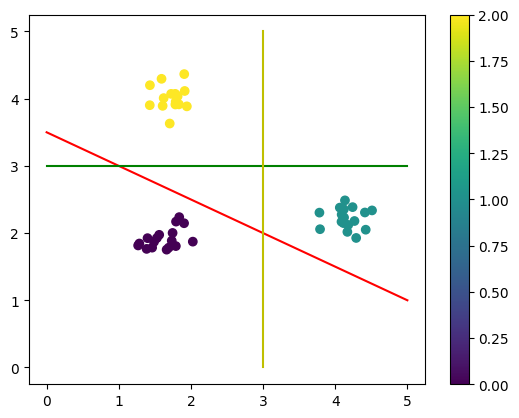

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)


line1x= np.arange(0,6)
line1y= lambda x: (x * -0.5) +3.5

line2x = np.arange(0,6)
line2y = lambda x: (x * (0)) + 3

plt.plot(line1x,line1y(line1x), 'r-')
plt.plot(line2x,line2y(line1x), 'g-')
plt.plot(line2y(line1x),line2x, 'y-')
plt.plot()
plt.colorbar()

### Transform lables to one-hot coding
* Hint: Use Scikit-Learn

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
y

array([0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2,
       1, 0, 0, 1, 0, 1])

In [10]:
y.reshape(-1,1)

array([[0],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [0],
       [2],
       [2],
       [0],
       [2],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [2],
       [0],
       [0],
       [1],
       [2],
       [2],
       [2],
       [0],
       [2],
       [0],
       [0],
       [2],
       [0],
       [2],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1]])

In [11]:
onehot = OneHotEncoder()
y_one = onehot.fit_transform(y.reshape(-1,1)).toarray()
y_one



array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1

In [12]:
y_one=(y_one*2-1)

y_one

array([[ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [ 1., -1., -1.],
       [-1., -1.

### Manually find parameters $w$ and $b$ for
* for each Perceptron seperately
* then combine to single matrix multiplication formulation

In [13]:
def plot_line_from_normal_vector_and_offset(normal_vector, offset, x_range=None, ax=None, **kwargs):
    """
    Plots a 2D line defined by its normal vector w and offset b such that wx + b = 0.

    Args:
        normal_vector (list or numpy.ndarray): A 2D vector representing the normal to the line (w). Must be of length 2.
        offset (float): The offset (b) such that w.x + b = 0.
        x_range (tuple, optional): A tuple (xmin, xmax) specifying the range of x-values to plot.
                                     If None (default), a reasonable range is automatically determined.
        ax (matplotlib.axes._axes.Axes, optional): The matplotlib axes object to plot on. If None (default),
                                                  the current axes (plt.gca()) is used, or a new figure and axes
                                                  are created.
        **kwargs: Keyword arguments to pass to the `plot` function (e.g., color, linestyle, linewidth).

    Returns:
        matplotlib.lines.Line2D: The line object created by `ax.plot`.
    """
    normal_vector = np.array(normal_vector)  # Ensure it's a NumPy array for calculations

    if normal_vector.shape != (2,):
        raise ValueError("Normal vector must be a 2D vector (length 2).")

    w1, w2 = normal_vector

    if ax is None:
        fig, ax = plt.subplots()

    if x_range is None:
        # Determine a reasonable x-range
        xmin = -5
        xmax = 5
        x_range = (xmin, xmax)

    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 100)  # Generate x-values

    if w2 != 0:
        y = (-w1 * x - offset) / w2  # Solve for y: w1*x + w2*y + b = 0  =>  y = (-w1*x - b) / w2
    else:
        # Handle the case where the line is vertical (w2=0). Plot a vertical line.
        if w1 == 0:
            raise ValueError("Cannot plot line with w1=0 and w2=0.")
        x = np.full_like(x, -offset / w1)  # x is constant for a vertical line
        y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)  # generate y values spanning the current y-axis.



    line, = ax.plot(x, y, **kwargs)

    return line

(array([], dtype=int64),)


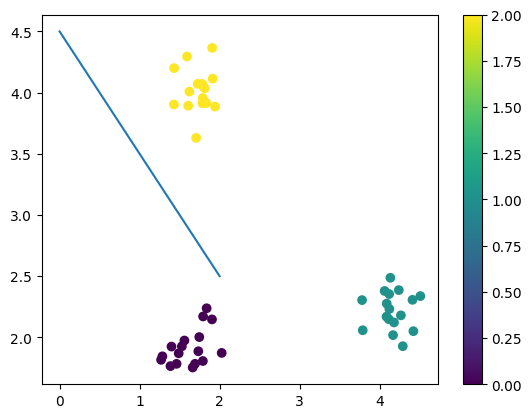

In [16]:
fig, ax1 = plt.subplots()




w1 = np.array([-1,-1])
b1 = (4.5)


w3 = np.array([0,1])
b3 = (-3)


w2 = np.array([1,0])
b2 = (-3.5)

pos=np.where(y_one[:,0]!=np.sign(w1.dot(X.T)+b1))

line1 = plot_line_from_normal_vector_and_offset(w1,b1,x_range= [0,2], ax= ax1)

#line2 = plot_line_from_normal_vector_and_offset(w2,b2,x_range= [0,5], ax= ax1)
#line3 = plot_line_from_normal_vector_and_offset(w3,b3,x_range= [0,5], ax= ax1)

plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()


print(pos)

#### test single perceptrons by class


In [17]:
#or
X[1,:].dot(w1)+b1

np.float64(-1.942461695386962)

In [18]:
# check for all train samples if sign(y)==sign(wx+b)
i=1
print (y_one[:,i],np.sign(w1.dot(X[i,:].T)+b1))
y[i]==np.sign(w1.dot(X[i,:].T)+b1)

[-1.  1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.
  1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1.] -1.0


np.False_

(array([], dtype=int64),)
[ 1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1.
 -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.
 -1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1. -1.]
[ 1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1.
 -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.
 -1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1. -1.]


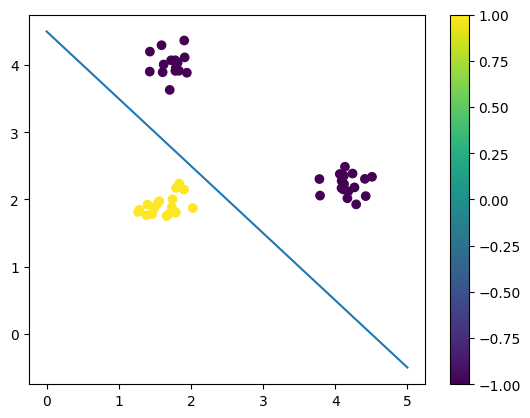

In [22]:
pos=np.where(y_one[:,0]!=np.sign(w1.dot(X.T)+b1))
print(pos)

y_test=np.copy(y_one[:,0])
print(y_test)
y_test[pos]= 0
print(y_test)
plot_line_from_normal_vector_and_offset(w1,b1,x_range= [0,5])
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()
#abline(1,2)

(array([], dtype=int64),)
[-1.  1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.
  1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1.]


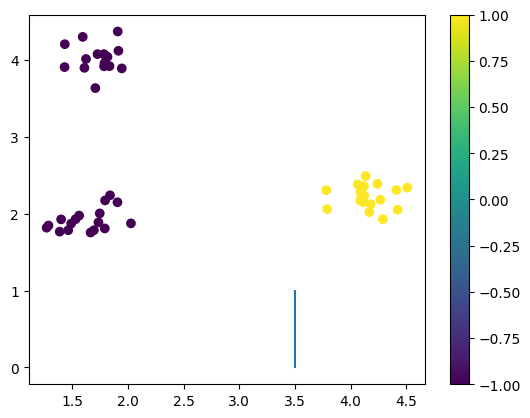

In [23]:
# get IDs of wrong classified
pos=np.where(y_one[:,1]!=np.sign(w2.dot(X.T)+b2))
print(pos)
y_test=np.copy(y_one[:,1])
y_test[pos]= 0
print(y_test)
plot_line_from_normal_vector_and_offset(w2,b2,x_range= [0,5])
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()
#abline(1,2)

(array([], dtype=int64),)
[-1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.
  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.]


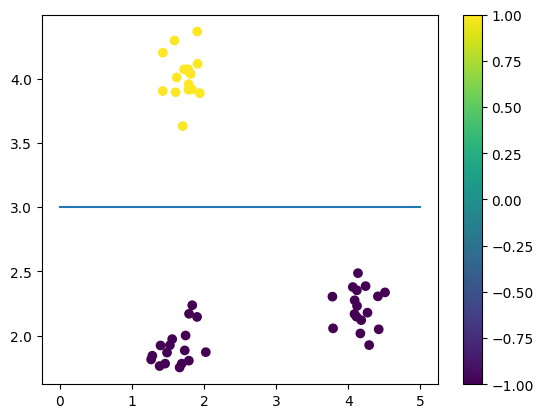

In [24]:
# get IDs of wrong classified
pos=np.where(y_one[:,2]!=np.sign(w3.dot(X.T)+b3))
print(pos)
y_test=np.copy(y_one[:,2])
y_test[pos]= 0
print(y_test)
plot_line_from_normal_vector_and_offset(w3,b3,x_range= [0,5])
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()
#abline(1,2)

#### test full Setup

## Add non-linear activation / loss -> $softmax$
* implement a $softmax$ function
* replace $sgn$ by $softmax$
* plot confidence of the test samples

In [60]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x)/sum(np.exp(x))


In [64]:
print(softmax(w3.dot(X.T)+b3))

[0.00610866 0.00915794 0.03200831 0.00664279 0.04975816 0.04672488
 0.00851746 0.00795019 0.04164253 0.04249754 0.00504777 0.04257865
 0.00725937 0.00750401 0.0082625  0.00559465 0.00521569 0.00790328
 0.01020121 0.00504873 0.04976663 0.00922403 0.06225952 0.00849936
 0.00707947 0.0058313  0.00628274 0.0072743  0.05195284 0.00742483
 0.04204618 0.00516642 0.00495559 0.00878444 0.05661284 0.04848626
 0.04801092 0.0055192  0.04132842 0.00743736 0.00550194 0.04433526
 0.00536848 0.06678259 0.00659273 0.00582566 0.00489988 0.00638363
 0.00581338 0.0089295 ]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


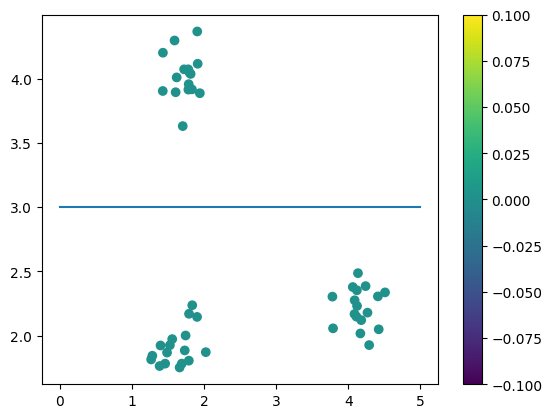

In [65]:
pos=np.where(y_one[:,2]!=softmax(w3.dot(X.T)+b3))
print(pos)
y_test=np.copy(y_one[:,2])
y_test[pos]= 0
print(y_test)
plot_line_from_normal_vector_and_offset(w3,b3,x_range= [0,5])
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()